In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack,csr_matrix
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML-lab3final.xlsx')
#TF-IDF
tfidf_vectorizer = TfidfVectorizer()
text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
numerical_data = sentence_data.iloc[:,1 :-1].values
labels = sentence_data['label'].values
combined_features = hstack([text,csr_matrix(numerical_data)])
X_train, X_test, Y_train, Y_test = train_test_split(combined_features, labels, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
# prediction on traing and testing
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
# Confusion matrix
confusion_train = confusion_matrix(Y_train, Y_train_pred)
confusion_test = confusion_matrix(Y_test, Y_test_pred)
print("CONFUSION MATRIX OF TRAINING DATA:")
print(confusion_train)
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print("PERFORMANCE METRICS:")
print(f"PRECISION: {precision_train:.2f}")
print(f"RECALL: {recall_train:.2f}")
print(f"F1-SCORE: {f1_train:.2f}")
print("\n")
print("CONFUSION MATRIX OF TESTING DATA:")
print(confusion_test)
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print("PERFORMANCE METRICS:")
print(f"PRECISION: {precision_test:.2f}")
print(f"RECALL: {recall_test:.2f}")
print(f"F1-SCORE: {f1_test:.2f}")


Mounted at /content/drive
CONFUSION MATRIX OF TRAINING DATA:
[[327   9]
 [ 15 269]]
PERFORMANCE METRICS:
PRECISION: 0.97
RECALL: 0.95
F1-SCORE: 0.96


CONFUSION MATRIX OF TESTING DATA:
[[140   3]
 [  9 114]]
PERFORMANCE METRICS:
PRECISION: 0.97
RECALL: 0.93
F1-SCORE: 0.95


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the data
drive.mount('/content/drive')
data1= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data (1).xlsx',sheet_name="IRCTC Stock Price")

# Prepare the data
price = data1.copy()
price['Predicted_Price'] = price['Price'].shift(1)  # Using the previous day's price as the prediction
price = price.dropna()  # Drop rows with NaN values

# Extract real and predicted prices
realprice = price['Price'].values
assumedprice = price['Predicted_Price'].values

# Calculate metrics
mse = mean_squared_error(realprice, assumedprice)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(realprice, assumedprice)
r2 = r2_score(realprice, assumedprice)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R²) Score:", r2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 1371.1075604838709
Root Mean Squared Error (RMSE): 37.028469594136226
Mean Absolute Percentage Error (MAPE): 0.013644497650508165
R-squared (R²) Score: 0.9762095325063174


In [ ]:
purchase_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx', usecols=[0,1, 2, 3,4])


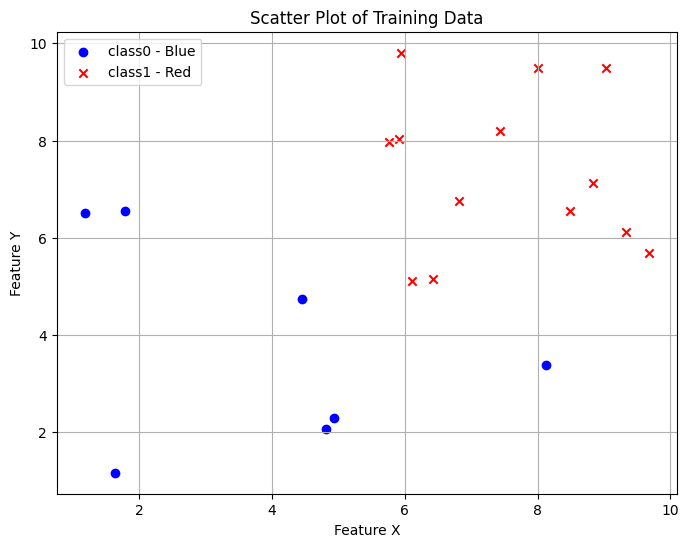

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X_train= np.random.uniform(1, 10, 20)
Y_train= np.random.uniform(1, 10, 20)
#classification
classes = np.where(((Y_train>5)&(X_train>5)), 1, 0)
plt.figure(figsize=(8, 6))
#plots
plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', label='class0 - Blue', marker='o')
plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', label='class1 - Red', marker='x')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-7-11d522de23be>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


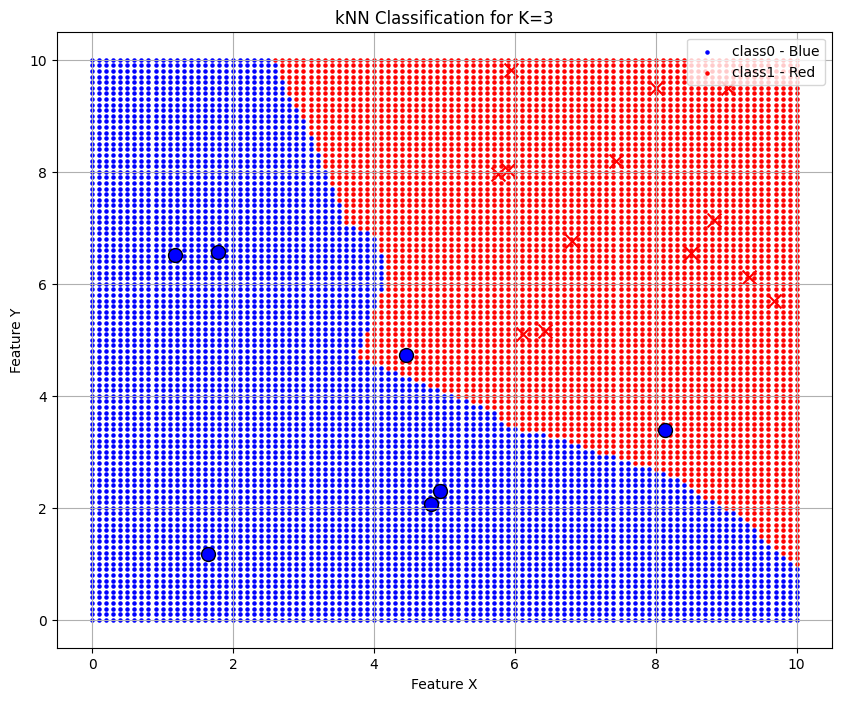

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
X_train = np.random.uniform(1, 10, 20)  # Feature X for training data
Y_train = np.random.uniform(1, 10, 20)  # Feature Y for training data
classes = np.where(((Y_train > 5) & (X_train > 5)), 1, 0)
X_range = np.arange(0, 10.1, 0.1)
Y_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_range, Y_range)
# meshgrid into 1D arrays
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
# Combining X and Y
test_data = np.c_[X_test_flat, Y_test_flat]
train_data = np.c_[X_train, Y_train]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes)
predicted_classes = knn.predict(test_data)
plt.figure(figsize=(10, 8))
plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1],color='blue', label='class0 - Blue', s=5)
plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1],color='red', label='class1 - Red', s=5)
plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', edgecolor='black', marker='o', s=100)
plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification for K=3")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


<ipython-input-8-058b74b16140>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


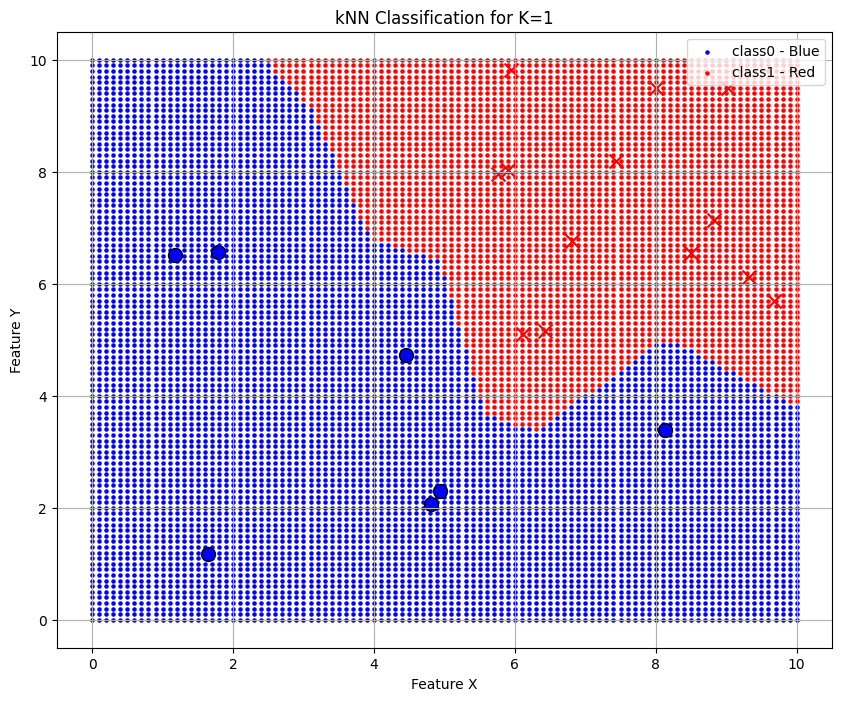

<ipython-input-8-058b74b16140>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


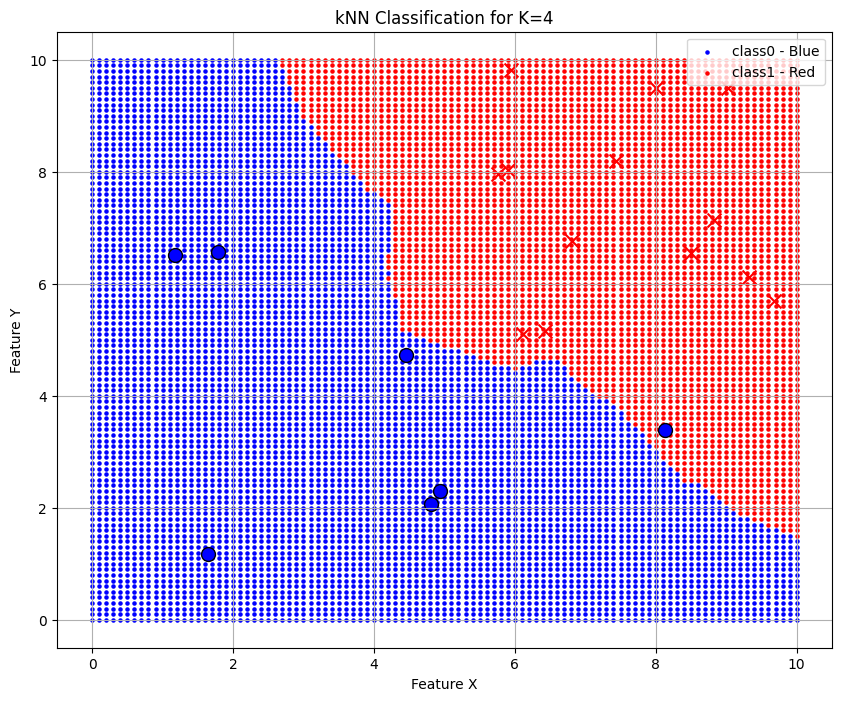

<ipython-input-8-058b74b16140>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


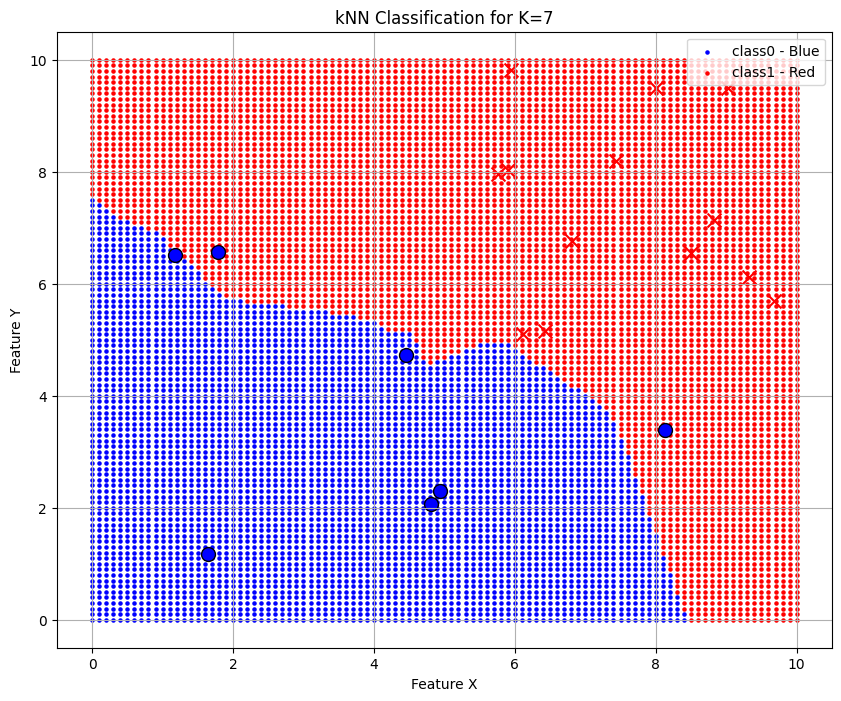

<ipython-input-8-058b74b16140>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


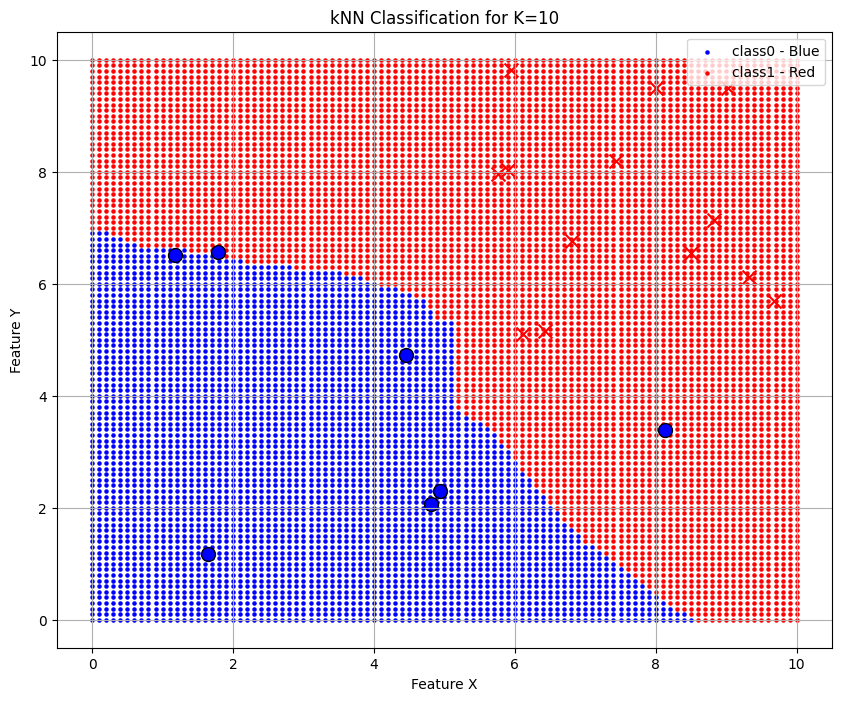

<ipython-input-8-058b74b16140>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)


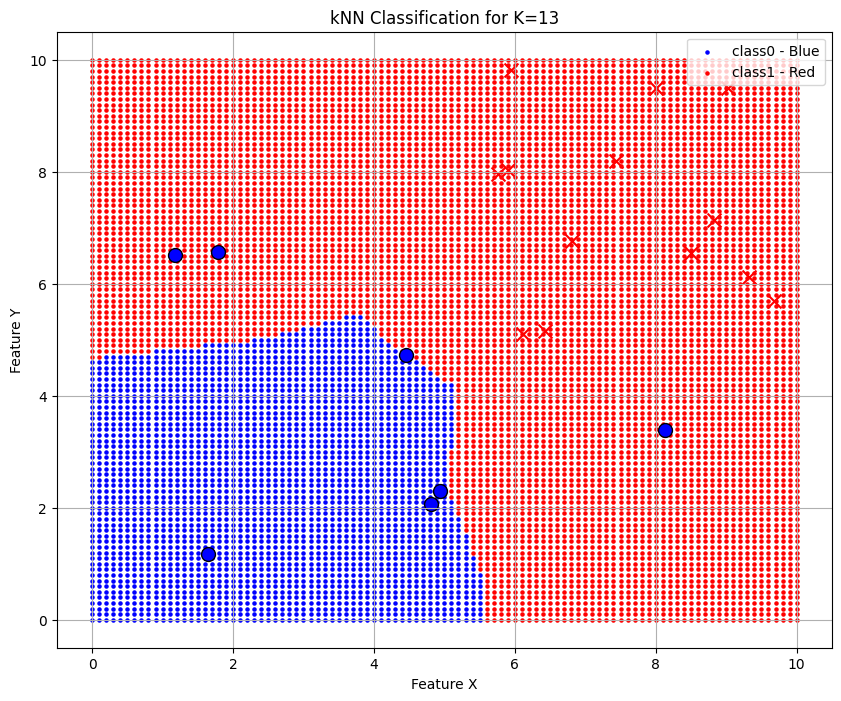

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
X_train = np.random.uniform(1, 10, 20)  # Feature X for training data
Y_train = np.random.uniform(1, 10, 20)  # Feature Y for training data
classes = np.where(((Y_train > 5) & (X_train > 5)), 1, 0)
X_range = np.arange(0, 10.1, 0.1)
Y_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_range, Y_range)
# meshgrid into 1D arrays
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
# Combining X and Y
test_data = np.c_[X_test_flat, Y_test_flat]
train_data = np.c_[X_train, Y_train]
for i in range(1,16,3):
   knn = KNeighborsClassifier(n_neighbors=i)
   knn.fit(train_data, classes)
   predicted_classes = knn.predict(test_data)
   plt.figure(figsize=(10, 8))
   plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1],color='blue', label='class0 - Blue', s=5)
   plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1],color='red', label='class1 - Red', s=5)
   plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', edgecolor='black', marker='o', s=100)
   plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', marker='x', s=100)
   plt.xlabel("Feature X")
   plt.ylabel("Feature Y")
   plt.title("kNN Classification for K="+str(i))
   plt.legend(loc='upper right')
   plt.grid(True)
   plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


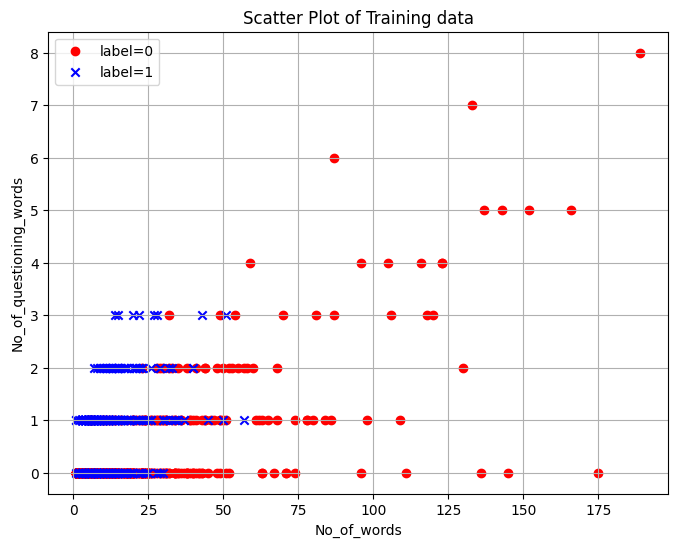

<ipython-input-15-d10b06d1e9dc>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=100, label='Training Class 1')


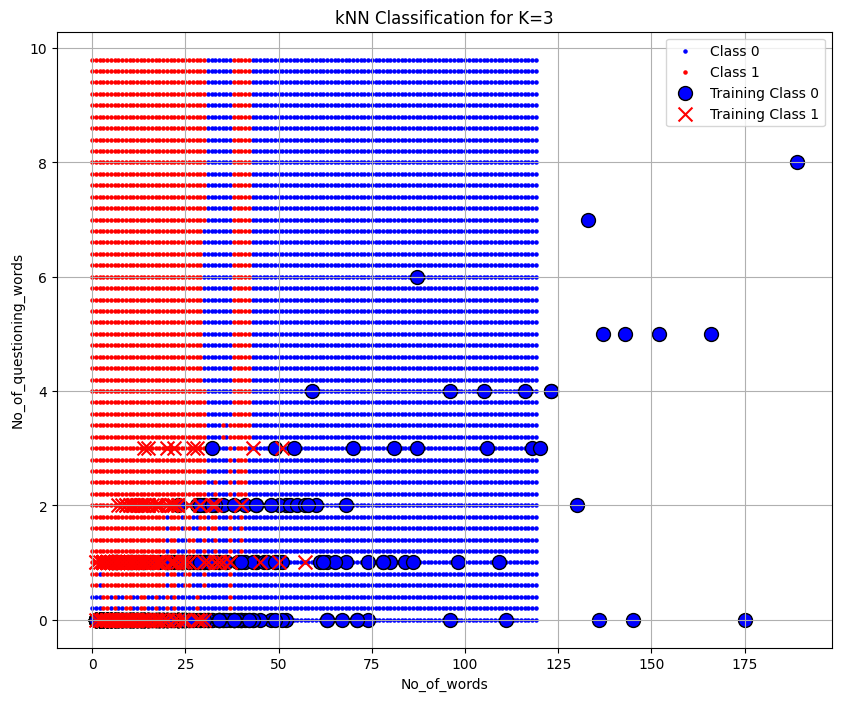

<ipython-input-15-d10b06d1e9dc>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')


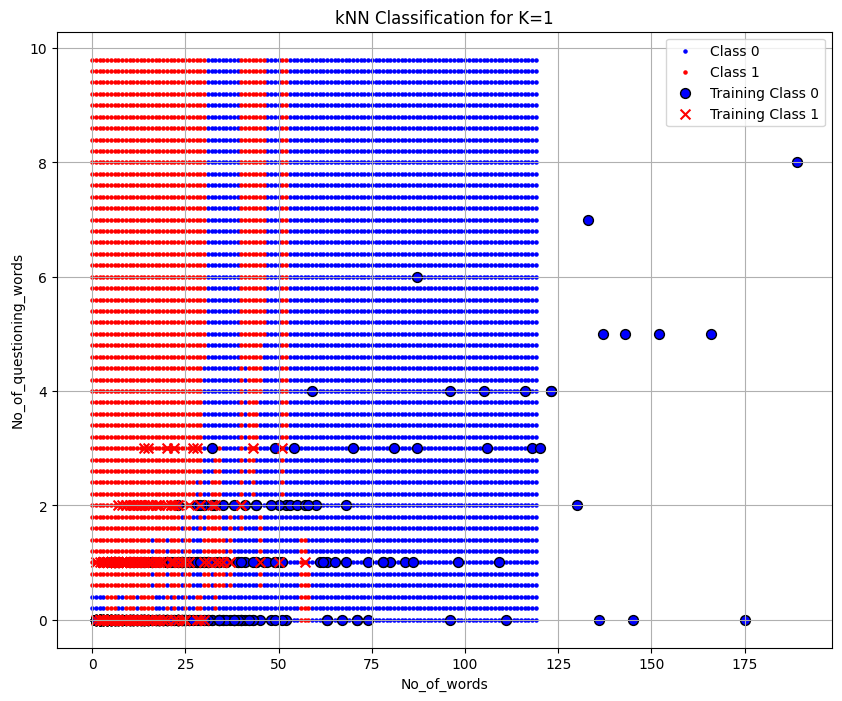

<ipython-input-15-d10b06d1e9dc>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')


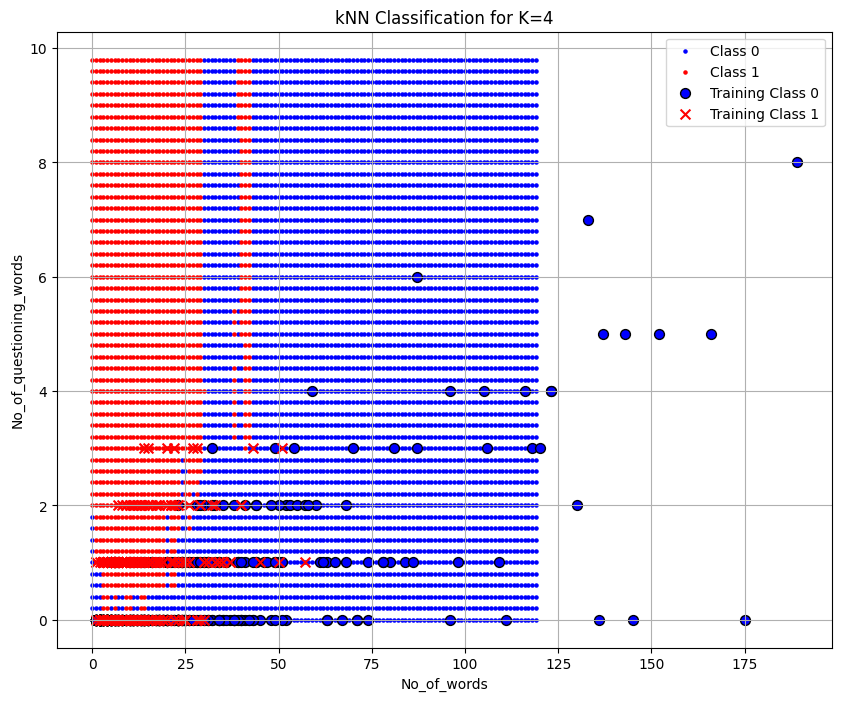

<ipython-input-15-d10b06d1e9dc>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')


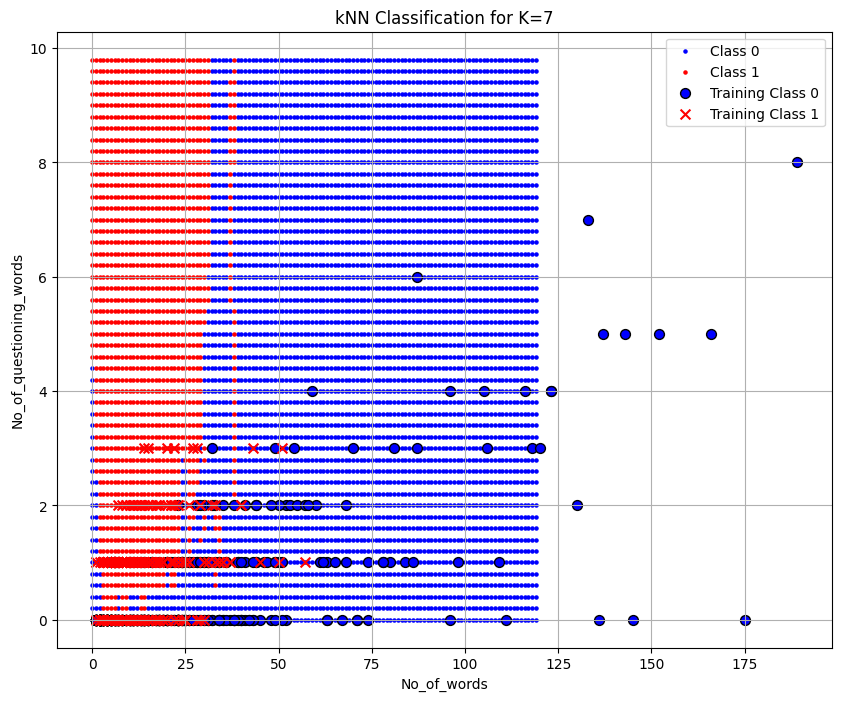

<ipython-input-15-d10b06d1e9dc>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')


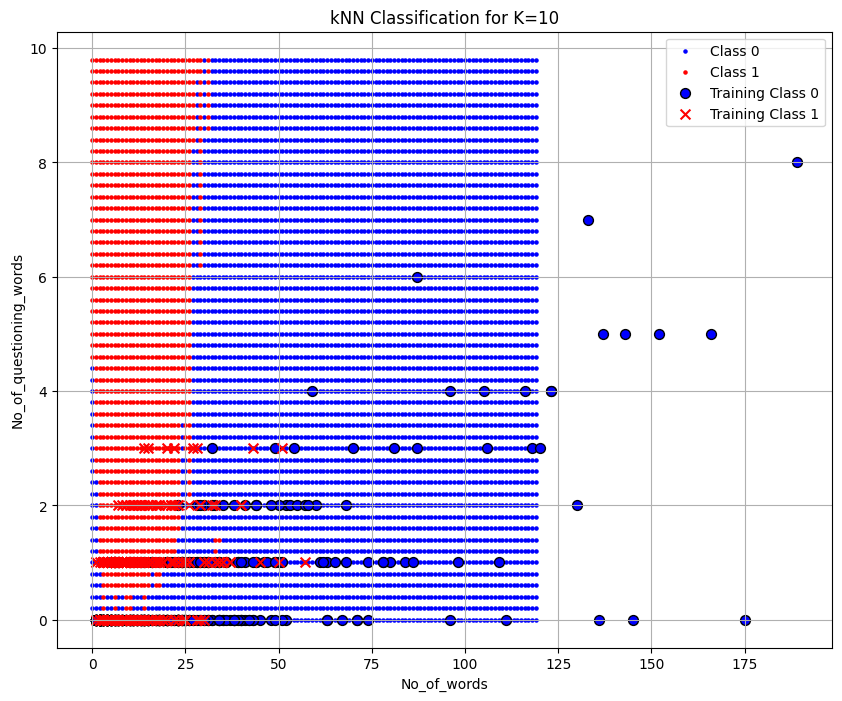

<ipython-input-15-d10b06d1e9dc>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')


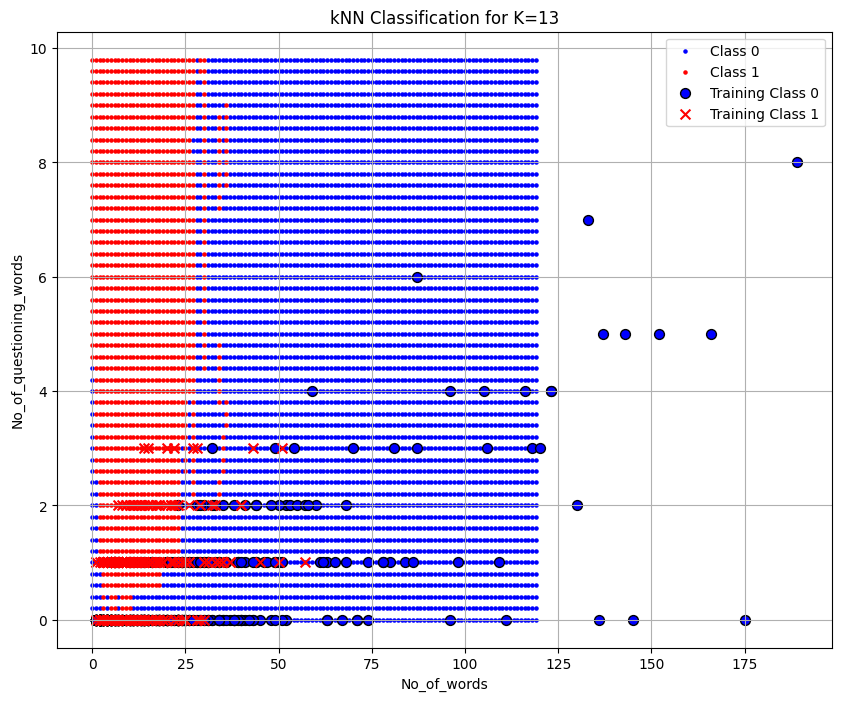

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML-lab3final.xlsx')
label_0= sentence_data[sentence_data['label'] == 0]
label_1=sentence_data[sentence_data['label'] == 1]
#classification
plt.figure(figsize=(8, 6))
#plots
plt.scatter(label_0['No_of_words'],label_0['No_of_questoning_words'], color='red', label='label=0',marker='o')
plt.scatter(label_1['No_of_words'], label_1['No_of_questoning_words'], color='blue', label='label=1',marker='x')
plt.title('Scatter Plot of Training data')
plt.xlabel('No_of_words')
plt.ylabel('No_of_questioning_words')
plt.legend()
plt.grid(True)
plt.show()
X_train = sentence_data[['No_of_words', 'No_of_questoning_words']].values
y_train = sentence_data['label'].values
X_range = np.arange(0,120, 1)
Y_range = np.arange(0,10, 0.2)
X_test, Y_test = np.meshgrid(X_range, Y_range)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
test_data = np.c_[X_test_flat, Y_test_flat]
# kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicted_classes = knn.predict(test_data)
plt.figure(figsize=(10, 8))
plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='Class 0', s=5)
plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='Class 1', s=5)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', edgecolor='black', marker='o', s=100, label='Training Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=100, label='Training Class 1')
plt.xlabel("No_of_words")
plt.ylabel("No_of_questioning_words")
plt.title("kNN Classification for K=3")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
for i in range(1,15,3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(test_data)
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='Class 0', s=5)
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='Class 1', s=5)
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', edgecolor='black', marker='o', s=50, label='Training Class 0')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', marker='x', s=50, label='Training Class 1')
    plt.xlabel("No_of_words")
    plt.ylabel("No_of_questioning_words")
    plt.title("kNN Classification for K="+str(i))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [14]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack, csr_matrix
from scipy.stats import randint
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML-lab3final.xlsx')
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(sentence_data['Text'])
numerical_features = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values
labels = sentence_data['label'].values
combined_features = hstack([text_features, csr_matrix(numerical_features)])
X_train, X_test, Y_train, Y_test = train_test_split(combined_features, labels, test_size=0.3, random_state=42)
# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 21)
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k value: {best_k}")
print(f"Best cross-validated accuracy score: {best_score:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best k value: 3
Best cross-validated accuracy score: 0.94
